In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, RandomFlip, RandomRotation, RandomZoom

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[train_labels[2]]

'T-shirt/top'

In [ ]:
model =keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', input_shape=(28,28,1),padding="valid"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3 , activation='relu',padding="valid"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3 , activation='relu',padding="valid"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
X_test = test_images.reshape(test_images.shape[0], 28, 28, 1)
history = model.fit(X_train, train_labels,epochs = 4,validation_data=(X_test, test_labels))

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 327s 173ms/step - accuracy: 0.6485 - loss: 0.9589 - val_accuracy: 0.8645 - val_loss: 0.3680
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 373s 168ms/step - accuracy: 0.8539 - loss: 0.4147 - val_accuracy: 0.8768 - val_loss: 0.3367
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 321s 171ms/step - accuracy: 0.8797 - loss: 0.3414 - val_accuracy: 0.8862 - val_loss: 0.3040
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 322s 171ms/step - accuracy: 0.8907 - loss: 0.3116 - val_accuracy: 0.8987 - val_loss: 0.2873


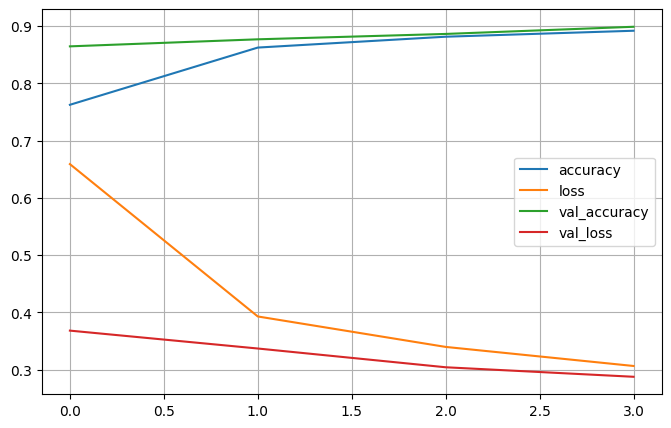

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step


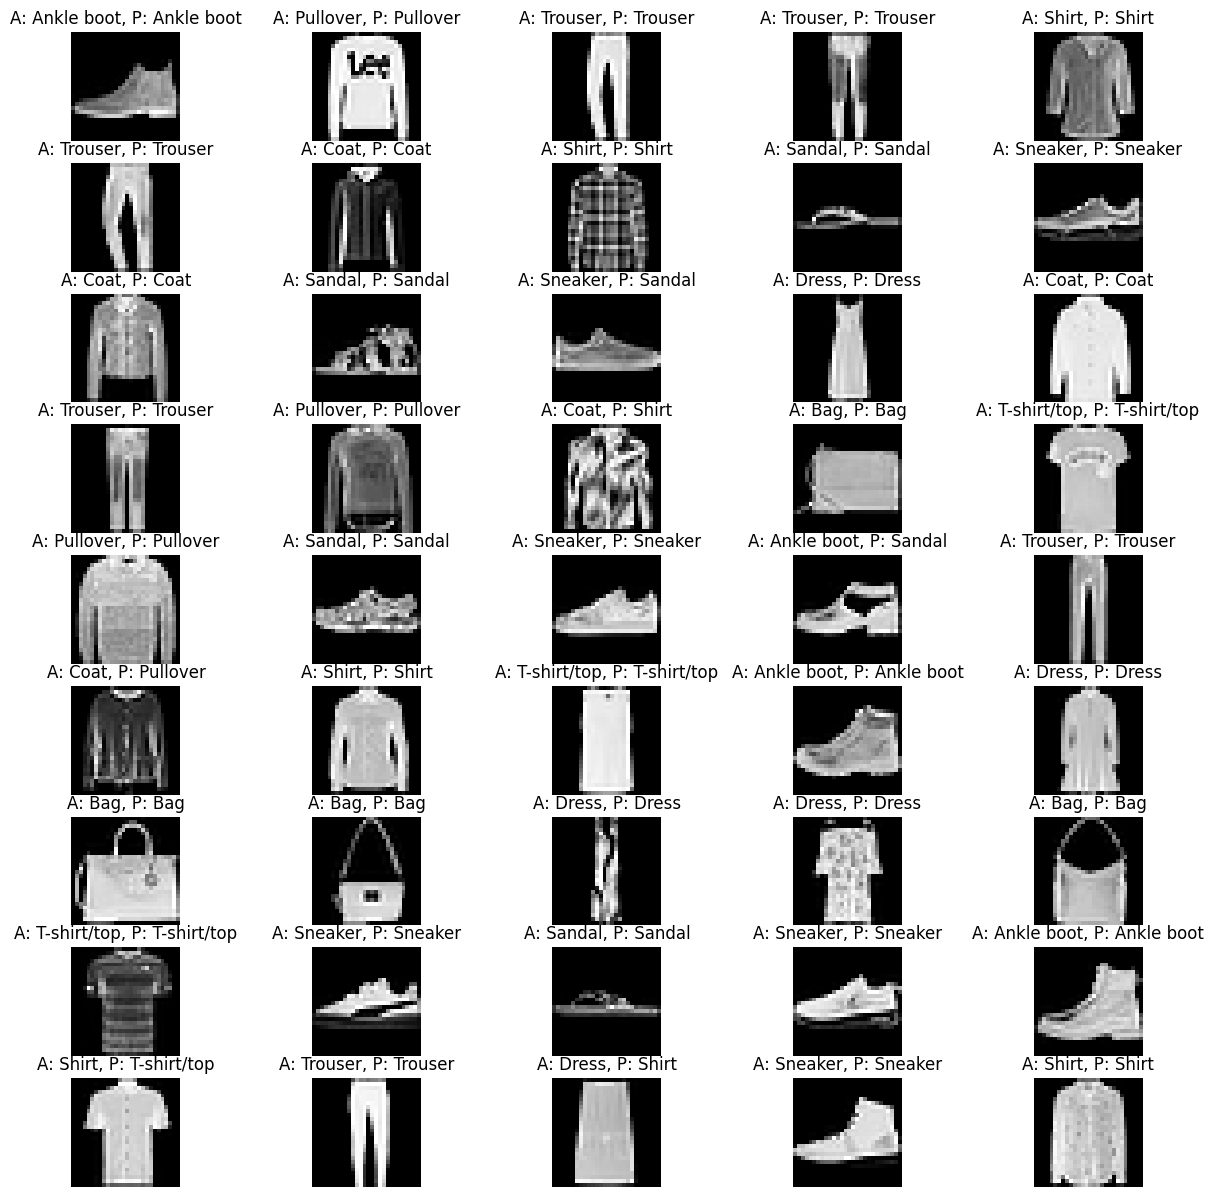

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
plt.figure(figsize=(15, 15))
for i in range(45):
    plt.subplot(9, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"A: {class_names[test_labels[i]]}, P: {class_names[y_pred[i]]}")
    plt.axis('off')
plt.show()

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [11]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/dogs-vs-cats/train",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
    seed=123,
    validation_split=None,
    subset= None,
    interpolation="bilinear",
    follow_links=False,
)
valid_dataset = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/dogs-vs-cats/test",
    labels="inferred",
    label_mode="int",
    image_size=(256,256),
    batch_size=32,
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
def process(image , label):
    #image = tf.image.resize(image, (128, 128))
    image = tf.cast(image/255. , tf.float32)
    return image , label
train_dataset = train_dataset.map(process)
valid_dataset = valid_dataset.map(process)


In [33]:
model1 =keras.models.Sequential([
    RandomFlip("horizontal"),
    #RandomRotation(0.1),
    RandomZoom(0.1),
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3),padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, (3,3) , activation='relu',padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3 , activation='relu',padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │    13,107,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,226,405 (50.45 MB)

 Trainable params: 13,226,405 (50.45 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model1.fit(train_dataset,epochs = 10,validation_data=(valid_dataset))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 101ms/step - accuracy: 0.5286 - loss: 0.7080 - val_accuracy: 0.5594 - val_loss: 0.6723
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.6090 - loss: 0.6556 - val_accuracy: 0.7282 - val_loss: 0.5540
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.7104 - loss: 0.5683 - val_accuracy: 0.7520 - val_loss: 0.5116
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.7636 - loss: 0.4990 - val_accuracy: 0.7950 - val_loss: 0.4491
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.7922 - loss: 0.4505 - val_accuracy: 0.8100 - val_loss: 0.4048
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.8111 - loss: 0.4219 - val_accuracy: 0.8222 - val_loss: 0.3889
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.8291 - loss: 0.3913 - val_accuracy: 0.8286 - val_loss: 0.3827
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.8424 - loss: 0.3

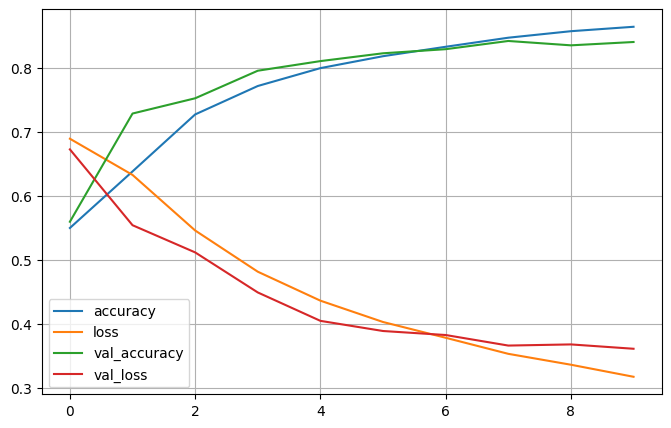

In [36]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [48]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_cat_dog(model,image_path , img_size=(256, 256)):
  """
  Loads an image, preprocesses it, and uses the model to predict if it's a cat or dog.

  Args:
    image_path (str): Path to the image file.
    model: The trained Keras model for cat/dog classification.
    img_size (tuple): The target size for resizing the image (height, width).

  Returns:
    str: "Dog" if the model predicts dog, "Cat" if the model predicts cat.
  """
  img = image.load_img(image_path, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0) # Create a batch
  img_array /= 255.0  # Rescale to the same range as the training data

  prediction = model.predict(img_array)

  if prediction[0][0] > 0.5:
    return prediction ,"it is a Dog"
  else:
    return prediction , "it is a Cat"
predict_cat_dog(model2,"/content/doggy.jpeg")
#predict_cat_dog(model1,"/content/dog.jpeg")
# Example usage:
# Replace 'path/to/your/image.jpg' with the actual path to your image
# prediction = predict_cat_dog('path/to/your/image.jpg', model1)
# print(f"The image is predicted to be a: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


(array([[0.9991875]], dtype=float32), 'it is a Dog')

In [17]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)

In [22]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [18]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [19]:
model2 = keras.models.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    conv_base,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [20]:
history = model2.fit(train_dataset,epochs = 10,validation_data=(valid_dataset))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 242ms/step - accuracy: 0.8592 - loss: 0.2785 - val_accuracy: 0.9722 - val_loss: 0.0715
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 238ms/step - accuracy: 0.9591 - loss: 0.1043 - val_accuracy: 0.9676 - val_loss: 0.0827
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 263ms/step - accuracy: 0.9686 - loss: 0.0794 - val_accuracy: 0.9734 - val_loss: 0.0674
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 239ms/step - accuracy: 0.9746 - loss: 0.0650 - val_accuracy: 0.9792 - val_loss: 0.0563
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 239ms/step - accuracy: 0.9785 - loss: 0.0541 - val_accuracy: 0.9762 - val_loss: 0.0606
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 239ms/step - accuracy: 0.9828 - loss: 0.0434 - val_accuracy: 0.9762 - val_loss: 0.0646
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 217s 264ms/step - accuracy: 0.9850 - loss: 0.0408 - val_accuracy: 0.9756 - val_loss: 0.0672
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 239ms/step - accuracy: 0.9884 -

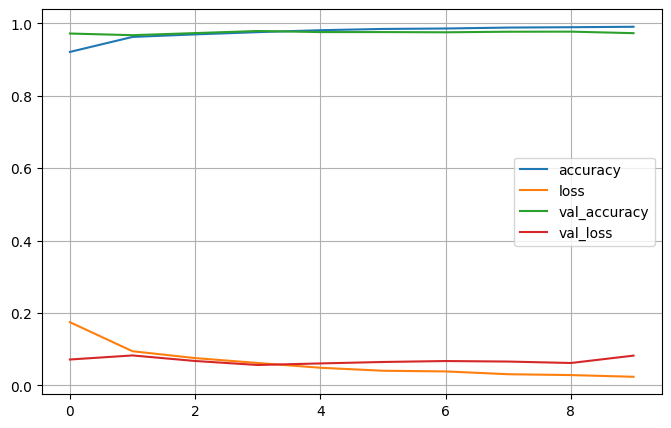

In [21]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()